# Notebook to analyse the discrimination in the dataset about who is stopped

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("./data/train.csv", index_col = "observation_id")
df

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,station
observation_id,,,,,,,,,,,,,,,
34d76816-cfc2-4bdd-b3a2-bf0c40b12689,Person search,2019-12-01T00:00:00+00:00,True,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
83c87ec1-e6d4-4bbb-8e0c-159516706359,Person search,2019-12-01T00:09:00+00:00,True,NaN,NaN,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
8c2eae4b-035a-492f-92d6-cd27e6c900a1,Person search,2019-12-01T00:10:00+00:00,True,NaN,NaN,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
e63a036a-a728-4efe-8e08-7198f56d6d0a,Person search,2019-12-01T00:10:00+00:00,False,NaN,NaN,Male,18-24,NaN,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
40c70aca-1f7f-4efe-8c5b-ade0f2e9937d,Person search,2019-12-01T00:12:00+00:00,True,50.368247,-4.126646,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a23dc59d-29fe-48e5-b012-81feb6acfddf,Person search,2018-08-29T02:45:00+00:00,NaN,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,wiltshire
425fde18-f7d5-4ebe-baf4-714cadd5a445,Person and Vehicle search,2018-08-29T21:00:00+00:00,False,51.540219,-1.764708,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Penalty Notice for Disorder,True,False,wiltshire
7c249ab7-d4bf-47ef-86bd-aad51d7d2aab,Person search,2018-08-29T21:10:00+00:00,False,51.540219,-1.764708,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,wiltshire


## Gender

In [49]:
df.Gender.nunique(), df.Gender.unique()

(3, array(['Male', 'Female', 'Other'], dtype=object))

In [48]:
# dropping Other value
df_gender = df[df['Gender'] != 'Other']

In [37]:
df_gender_count = df_gender.groupby("station").count()

In [38]:
Male_station_df = df_gender[df_gender["Gender"] == "Male"].groupby("station").count()

<AxesSubplot:xlabel='station'>

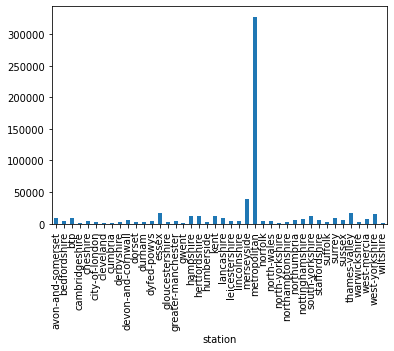

In [32]:
Male_station_df["Gender"].plot(kind="bar")

This is the quantity of Males that are stopped on each station, we probably want to turn this into a normalized value, maybe divide by the quantity of people that are stopped overall in each station

<AxesSubplot:xlabel='station'>

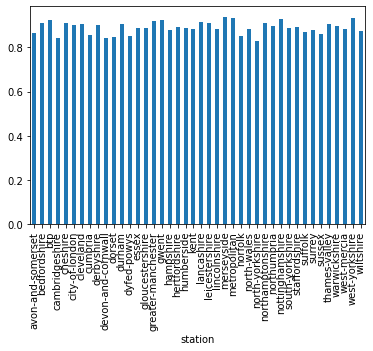

In [42]:
Male_station_df_norm = (Male_station_df["Gender"]/df_gender_count["Gender"])
Male_station_df_norm.plot(kind="bar")

For Males, normalized values seemed very close together all between 0.8 and 1

Let's check on the Females

In [131]:
Female_station_df = df_gender[df_gender["Gender"] == "Female"].groupby("station").count()

<AxesSubplot:xlabel='station'>

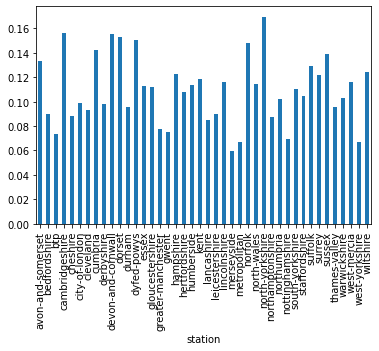

In [132]:
Female_station_df_norm = (Female_station_df["Gender"]/df_gender_count["Gender"])
Female_station_df_norm.plot(kind="bar")

There are a bit more fluctuations around the Female class

Now make a function that loops this and checks if any break this

In [126]:
def verifiy_discrimination(df, sensitive_column="Gender", max_dif=0.1):
    """
        Groups the dataframe by station, calculates the percentage for each sensitive_column and compares the values
    between stations. If any have a geater difference than max_diff then claim there is discrimination
    """
    df_station = df.copy()
    # Get a list of the sensitive classes
    sensitive_classes = df_station[sensitive_column].unique()
    
    # Group the DF by station and keep the total values
    df_total_vals = df_station.groupby("station").count()
    
    problematic_departments = []
    non_problematic_departments = []
    for sens_class in sensitive_classes:
        # print(df_station)
        # group the df and count how many occurrences in the class
        df_grouped = df_station[df_station[sensitive_column] == sens_class].groupby("station").count()
        
        # normalise the values
        df_normed = (df_grouped[sensitive_column]/df_total_vals[sensitive_column])

        for station, value in df_normed.items():
            # grab the series onwards
            normed_sliced_df = df_normed.loc[station:]
            
            for station2, value2 in normed_sliced_df.items():
                subt = np.abs(value - value2)
                # print(station, station2)
                if subt > max_dif:
                    # found discrimination
                    problematic_departments.append((sens_class, subt, station, station2))
                else:
                    non_problematic_departments.append((sens_class, subt, station, station2))
        
    
    return (problematic_departments, non_problematic_departments)

In [127]:
problematic_departments, non_problematic_deparments = verifiy_discrimination(df_gender)
print(problematic_departments)

[('Male', 0.10982733946784062, 'merseyside', 'north-yorkshire'), ('Male', 0.10293748532434699, 'metropolitan', 'north-yorkshire'), ('Male', 0.10062704432250724, 'north-yorkshire', 'nottinghamshire'), ('Male', 0.10274697741726202, 'north-yorkshire', 'west-yorkshire'), ('Female', 0.10982733946784058, 'merseyside', 'north-yorkshire'), ('Female', 0.10293748532434692, 'metropolitan', 'north-yorkshire'), ('Female', 0.10062704432250726, 'north-yorkshire', 'nottinghamshire'), ('Female', 0.10274697741726202, 'north-yorkshire', 'west-yorkshire')]


Above we have the results. Which gender is being discriminated and in between what stations. The default value here is if the difference between stations is of more than 10% and we have the same 3 departments that discriminate each gender (which in retrospective makes sense, since there are only 2 classes)

## Analysing discrimination as time goes by

Now let's try and add time into factor here. Check if this occurs more specifically in the latest months